In [1]:
import os

import kagglehub
import matplotlib.pyplot as plt
from torchvision import transforms
from PIL import Image
from pathlib import Path


/home/i.karakulin/DL/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
# path_to_kaggle_data = Path(kagglehub.dataset_download("alexattia/the-simpsons-characters-dataset"))
# path_to_dataset = Path(os.path.join(path_to_kaggle_data, 'simpsons_dataset/simpsons_dataset'))

# path_to_dataset = Path('/home/ilya/Documents/Classification-of-the-Simpsons/data/dataset')
path_to_dataset = Path('/home/i.karakulin/Classification-of-the-Simpsons/simpsons dataset/data/dataset')

In [4]:
train_val_files = sorted(list(path_to_dataset.rglob('*.jpg')))

In [5]:
simpsons_count = dict()

In [6]:
def check_count_simpsons(path):
    for simpson in os.listdir(path):
        simpsons_count[simpson] = len(os.listdir(os.path.join(path, simpson)))

    plt.figure(figsize=(17, 10))
    plt.barh(simpsons_count.keys(), simpsons_count.values(), color='skyblue')
    plt.xlabel('Counts')
    plt.ylabel('Simpsons')
    plt.tight_layout()
    plt.show()

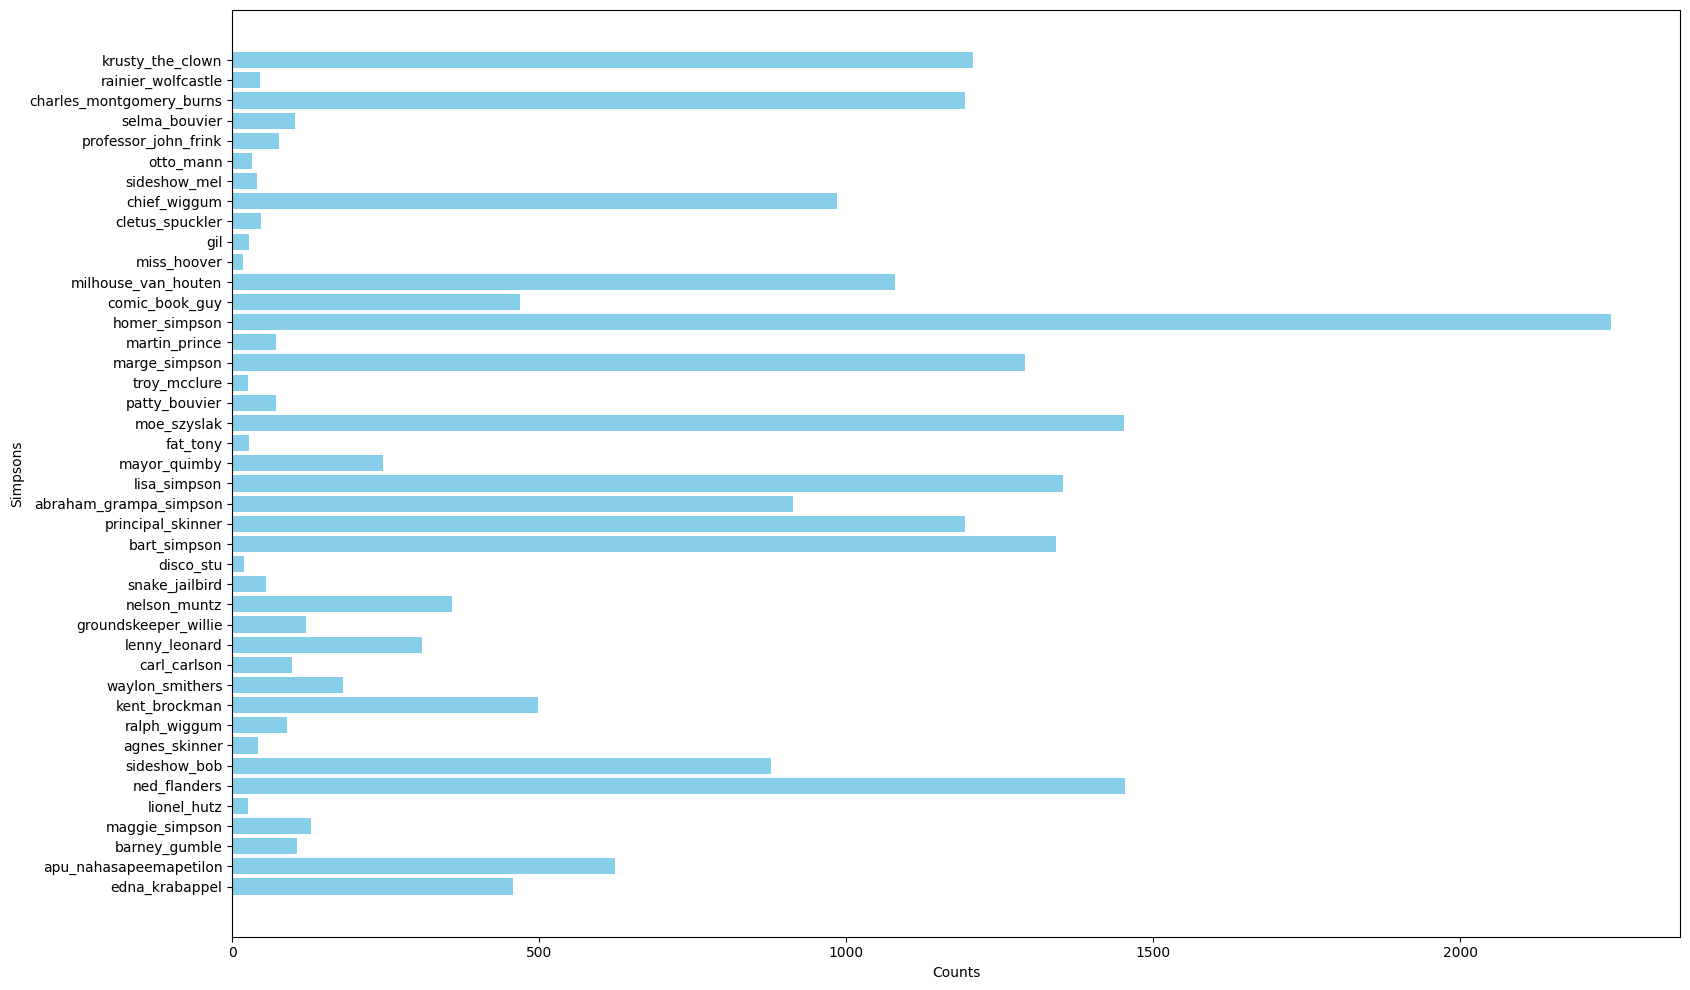

In [7]:
check_count_simpsons(path_to_dataset)

In [8]:
simpsons_count.keys()

dict_keys(['edna_krabappel', 'apu_nahasapeemapetilon', 'barney_gumble', 'maggie_simpson', 'lionel_hutz', 'ned_flanders', 'sideshow_bob', 'agnes_skinner', 'ralph_wiggum', 'kent_brockman', 'waylon_smithers', 'carl_carlson', 'lenny_leonard', 'groundskeeper_willie', 'nelson_muntz', 'snake_jailbird', 'disco_stu', 'bart_simpson', 'principal_skinner', 'abraham_grampa_simpson', 'lisa_simpson', 'mayor_quimby', 'fat_tony', 'moe_szyslak', 'patty_bouvier', 'troy_mcclure', 'marge_simpson', 'martin_prince', 'homer_simpson', 'comic_book_guy', 'milhouse_van_houten', 'miss_hoover', 'gil', 'cletus_spuckler', 'chief_wiggum', 'sideshow_mel', 'otto_mann', 'professor_john_frink', 'selma_bouvier', 'charles_montgomery_burns', 'rainier_wolfcastle', 'krusty_the_clown'])

In [9]:
max_count = max(simpsons_count.values())
max_count

2246

In [10]:
def load_image(path):
    image = Image.open(path)
    image.load()
    
    if image.mode in ('RGBA', 'LA', 'P'):
        image = image.convert('RGB')
    
    return image, image.size

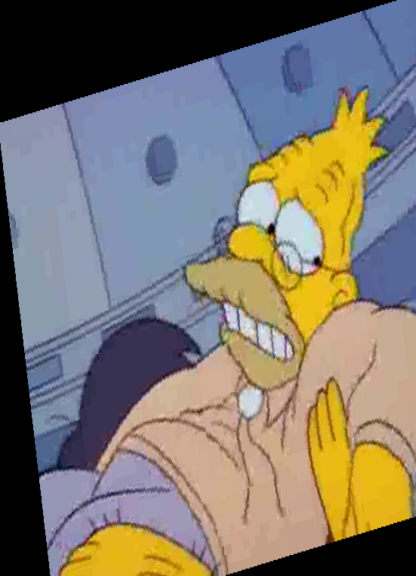

In [18]:
x, size = load_image(f'{path_to_dataset}/abraham_grampa_simpson/pic_0000.jpg')

transforms_train = transforms.Compose([
    transforms.RandomRotation(degrees=(-15, 15), expand=True),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomResizedCrop(size=size, scale=(0.6, 1)),
])

x = transforms_train(x)
x

In [19]:
for simpson in os.listdir(path_to_dataset):

    path_to_simpson_dir = os.path.join(path_to_dataset, simpson)
    img_list = os.listdir(path_to_simpson_dir)
    count_img_for_cur_simps = simpsons_count[simpson]

    path_list_to_simpson_imgs = []

    for img in img_list:
        path_list_to_simpson_imgs.append(os.path.join(path_to_simpson_dir, img))

    print(simpson, count_img_for_cur_simps, len(list(range(max_count - count_img_for_cur_simps))))
    
    for i in range(max_count - count_img_for_cur_simps):
        path_to_img = path_list_to_simpson_imgs[i % count_img_for_cur_simps]
        
        img, size = load_image(path_to_img)
        
        transform_img = transforms_train(img)
        transform_img.save(str(path_to_img)[:-4] + str(i + count_img_for_cur_simps) + ".jpg", "JPEG")


edna_krabappel 457 1789
apu_nahasapeemapetilon 623 1623
barney_gumble 106 2140
maggie_simpson 128 2118
lionel_hutz 25 2221
ned_flanders 1454 792
sideshow_bob 877 1369
agnes_skinner 42 2204
ralph_wiggum 89 2157
kent_brockman 498 1748
waylon_smithers 181 2065
carl_carlson 98 2148
lenny_leonard 310 1936
groundskeeper_willie 121 2125
nelson_muntz 358 1888
snake_jailbird 55 2191
disco_stu 19 2227
bart_simpson 1342 904
principal_skinner 1194 1052
abraham_grampa_simpson 913 1333
lisa_simpson 1354 892
mayor_quimby 246 2000
fat_tony 27 2219
moe_szyslak 1452 794
patty_bouvier 72 2174
troy_mcclure 26 2220
marge_simpson 1291 955
martin_prince 71 2175
homer_simpson 2246 0
comic_book_guy 469 1777
milhouse_van_houten 1079 1167
miss_hoover 17 2229
gil 27 2219
cletus_spuckler 47 2199
chief_wiggum 986 1260
sideshow_mel 40 2206
otto_mann 32 2214
professor_john_frink 76 2170
selma_bouvier 103 2143
charles_montgomery_burns 1193 1053
rainier_wolfcastle 45 2201
krusty_the_clown 1206 1040


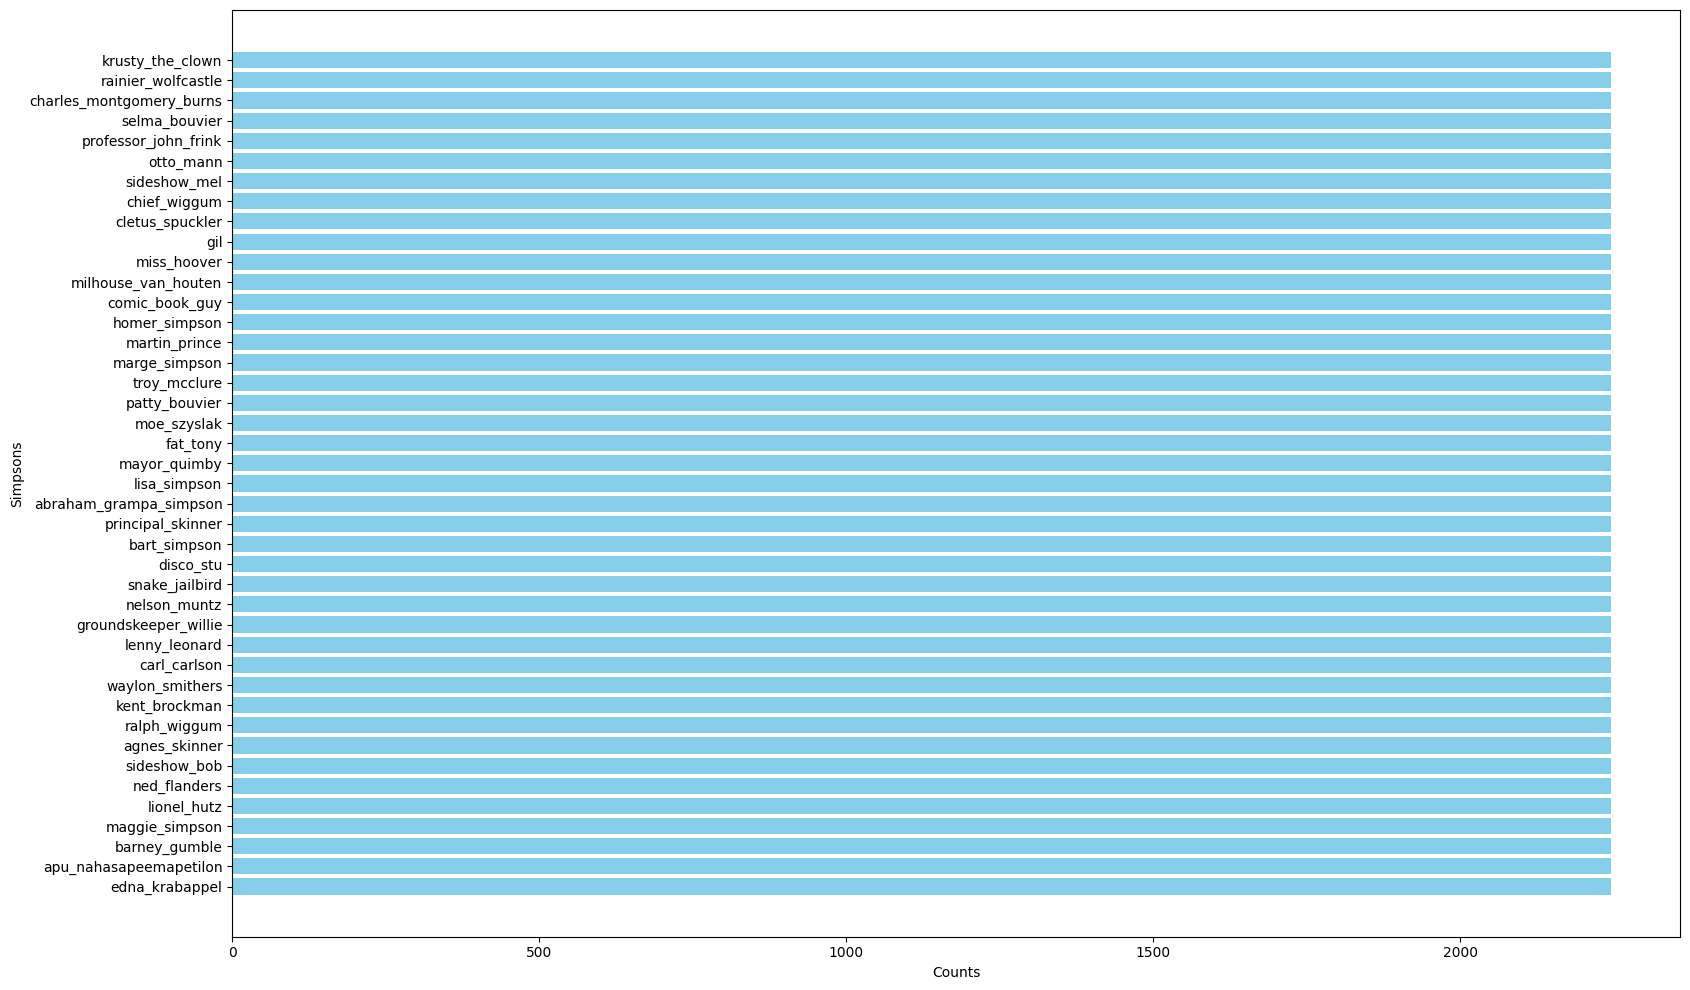

In [20]:
check_count_simpsons(path_to_dataset)